#### Student Name: Alan Gewerc
#### Student ID: 29961246
#### Student email: agew0001@student.monash.edu

<br><br>

# Part C. Self-Taught Learning

In this part, you implement self-taught learning for Neural Network using the Autoencoder that provided in Activity 5.2 and a 3-layer NN (from Activity 5.1 or H2O package)


Question 3 [Self Taught Neural Network Learning, 30 Marks]
    
    I. Load Task2C_labeled.csv, Task2C_unlabeled.csv and Task2C_test.csv data sets and required libraries (e.g., H2O). Note that we are going to use Task2C_labeled.csv and Task2C_unlabeled.csv for training the autoencoder. We are going to useTask2C_labeled.csv for training the classifier. Finally, we evaluate the trained classifier on the test Task2C_test.csv.



#### Import Libraries

In [2]:
library(gridExtra)
library(ggplot2)
library(repr)
library(reshape2)

## Initialize

In [13]:
library(h2o)
localH2O = h2o.init(nthreads = -1, port = 54321, startH2O = FALSE)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         14 seconds 550 milliseconds 
    H2O cluster timezone:       Australia/Sydney 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.30.0.4 
    H2O cluster version age:    7 days, 2 hours and 11 minutes  
    H2O cluster name:           H2O_started_from_R_hp_vkw254 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.97 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Amazon S3, Algos, AutoML, Core V3, TargetEncoder, Core V4 
    R Version:                  R version 3.6.3 (2020-02-29) 



In [20]:
# Important: To the run the code one was must use absolute path!!
labeled.frame <- h2o.importFile(path = 'data/Sintetic2C_labeled.csv' ,sep=',') 
unlabeled.frame <- h2o.importFile(path = 'data/Sintetic2C_unlabeled.csv' ,sep=',') 
test.frame <- h2o.importFile(path = 'data/Sintetic2C_test.csv' ,sep=',') 

labeled.frame[,1] <- as.factor(labeled.frame$label)
train.frame <- h2o.rbind(labeled.frame[,-1], unlabeled.frame[,-1])
test.frame[,1] <- as.factor(test.frame$label)


  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


In [21]:
# remove NA's
unlabeled.frame <- h2o.na_omit(unlabeled.frame)
unlabeled.frame[,1] <- NA

In [24]:
dim(unlabeled.frame)

[1] 100 785

II. Train an autoencoder (similar to Activity 5.2) with only one hidden layer and change the number of its neurons to: 20, 40, 60, 80, …, 400 (i.e. from 20 to 400 with a step size of 20).

In [25]:
error.rate <- function(Y1, T1){
  if (nrow(Y1)!=nrow(T1)){
    stop('error.rate: size of true lables and predicted labels mismatch')
  }
  return (sum(T1!=Y1)/nrow(T1))
}

In [48]:
options(warn=-1)

# build a neural network classifier based on the labeled training data
reconstruction.train.error <- matrix(NA, nrow=20, ncol=1)
reconstruction.test.error <- matrix(NA, nrow=20, ncol=1)
autoencoder_layer <- list() 


for (k in seq(20, 400, 20)){

    NN.model <- h2o.deeplearning(
        x = 1:ncol(train.frame), # select all pixels + extra features
        training_frame = train.frame, # specify the frame (imported file)
        hidden = k, # number of layers and their units
        activation = 'Tanh', # activation function 
        autoencoder = TRUE, # is it an autoencoder? Yes!
        l2 = 0.1,
        seed = 2000)
        
    reconstruction.train.error[k/20, ] <- mean(h2o.anomaly(NN.model, train.frame))
    reconstruction.test.error[k/20, ] <- mean(h2o.anomaly(NN.model, test.frame))
    autoencoder_layer[[k/20]] <- h2o.deepfeatures(NN.model, labeled.frame, layer = 1)
    
}

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

III. For each model in Step II, calculate and record the reconstruction error which is simply the average (over all data points while the model is fixed) of Euclidian distances between the input and output of the autoencoder (you can simply use “h2o.anomaly()” function). Plot these values where the x-axis is the number of units in the middle layer and the y-axis is the reconstruction error. Then, save and attach the plot to your PDF report. Explain your findings based on the plot in your PDF report.

In [49]:
print(t(reconstruction.train.error))

           [,1]        [,2]        [,3]        [,4]        [,5]        [,6]
[1,] 0.01395679 0.009428573 0.007432834 0.006169442 0.005419593 0.004845871
            [,7]       [,8]        [,9]       [,10]       [,11]       [,12]
[1,] 0.004384899 0.00417771 0.003981292 0.003721534 0.003635523 0.003403006
          [,13]       [,14]       [,15]       [,16]       [,17]       [,18]
[1,] 0.00334322 0.003305635 0.003333164 0.003292029 0.003226115 0.003160835
           [,19]       [,20]
[1,] 0.002937701 0.003150579


In [50]:
print(t(reconstruction.test.error))

          [,1]       [,2]       [,3]       [,4]       [,5]       [,6]
[1,] 0.1031595 0.09384249 0.08937671 0.08601663 0.08398185 0.08223593
           [,7]       [,8]       [,9]      [,10]      [,11]      [,12]
[1,] 0.08077711 0.08000393 0.07925805 0.07862919 0.07804723 0.07724192
          [,13]      [,14]      [,15]      [,16]     [,17]      [,18]     [,19]
[1,] 0.07694296 0.07673058 0.07637883 0.07610239 0.0762444 0.07550208 0.0750957
          [,20]
[1,] 0.07525221


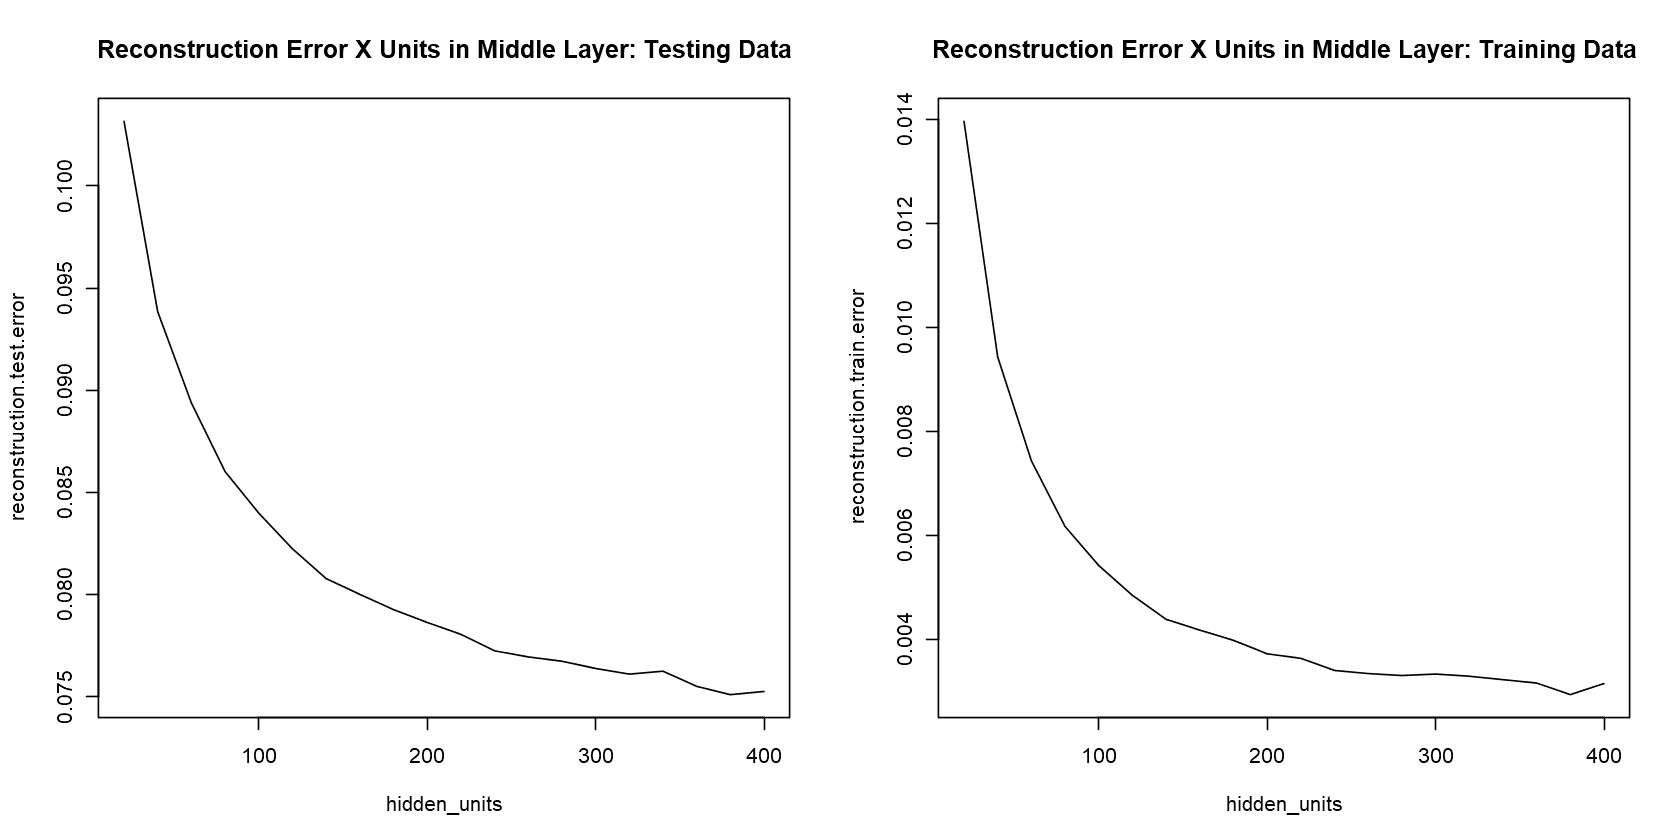

In [51]:
options(repr.plot.width = 14, repr.plot.height = 7) # Define plot size

hidden_units <- seq(20, 400, 20)

par(mfrow=c(1,2))
plot(x = hidden_units, y = reconstruction.test.error, type = "l",
     main = "Reconstruction Error X Units in Middle Layer: Testing Data")
plot(x = hidden_units, y = reconstruction.train.error, type = "l",
     main = "Reconstruction Error X Units in Middle Layer: Training Data")

    IV. Build the 3-layer NN from Activity 5.1 or “h2o.deeplearning” function (make sure you set “ autoencoder = FALSE”) to 
    build a classification model using all the original attributes from the training set and change the number of its 
    neurons to: 20, 40, 60, 80, .., 400 like Step II. For each model, calculate and record the test error.

In [52]:
options(warn=-1)
# build a neural network classifier based on the labeled training data

classification.test.error.aug < -matrix(NA, nrow=20, ncol=1)


for (k in seq(20, 400, 20)){

    NN.model <- h2o.deeplearning(
        x = 2:ncol(labeled.frame), # select all pixels + extra features
        y = 1,
        training_frame = labeled.frame, # specify the frame (imported file)
        hidden = c(k), # number of layers and their units
        activation = 'Tanh', # activation function 
        autoencoder = FALSE, # is it an autoencoder? No!
        l2 = 0.1,
        seed = 2000
    )
   
    test.predict <- h2o.predict(NN.model, test.frame)$predict
    classification.test.error[k/20, ] <- error.rate(test.frame$label, test.predict)    
}

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

    V. Build augmented self-taught networks using the models learnt in Step II. For each model:
    A. Add the output of the middle layer as extra features to the original feature set.
    B. Train a 3-layer NN (similar to Step IV) using all features (original + extra). Then calculate and record the test error.

In [58]:
options(warn=-1)
# build a neural network classifier based on the labeled training data

classification.test.error.aug <- matrix(NA, nrow=20, ncol=1)

for (k in seq(20, 400, 20)){
    
    labeled.frame.aug = h2o.cbind(labeled.frame, autoencoder_layer[[k/20]])
    NN.model <- h2o.deeplearning(
        x = 2:ncol(labeled.frame.aug), # select all pixels + extra features
        y = 1,
        training_frame = labeled.frame.aug, # specify the frame (imported file)
        hidden = c(k), # number of layers and their units
        activation = 'Tanh', # activation function 
        autoencoder = FALSE, # is it an autoencoder? No!
        l2 = 0.1,
        seed = 2000
    )
   
    test.predict.aug <- h2o.predict(NN.model, test.frame)$predict
    classification.test.error.aug[k/20, ] <- error.rate(test.frame$label, test.predict.aug)    
}

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

    VI. Plot the error rates for the 3-layer neural networks from Step IV and the augmented self-taught networks from Step V, while the x-axis is the number of extra features and y-axis is the classification error. Save and attach the plot to your PDF report. In your pdf, explain how the performance of the 3-layer neural networks and the augmented self-taught networks is different and why they are different or why they are not different, based on the plot.

    Hint: Since the dataset for this task is large and high-dimensional, running the whole experiments several times is very time consuming. Therefore, it is recommended to only use a small portion of your data when you develop or debug your code.

    Hint: If you can combine Step II, IV and V (so learn each autoencoder only once), you may save a great portion of the execution time.

    Hint: If you don’t see the expected behaviour in your plots, you may need to check that the data is clean, i.e. it doesn’t have NA entries, it’s normalised etc. Moreover, you may need to check that your implementation of the model and training/decoding algorithms is correct.

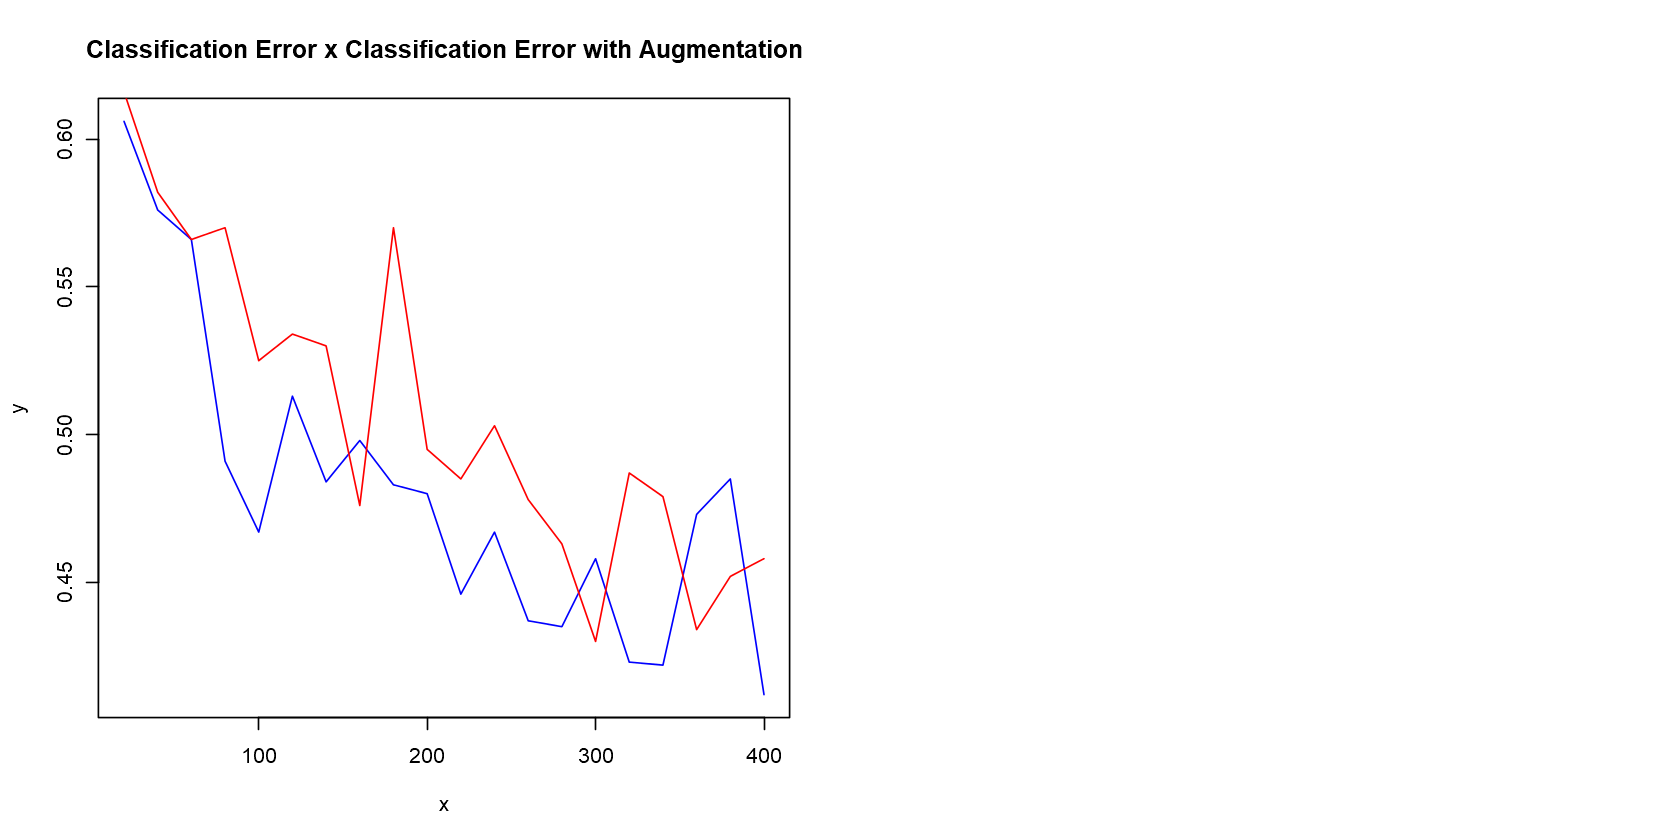

In [70]:
options(repr.plot.width = 14, repr.plot.height = 7) # Define plot size

hidden_units <- seq(20, 400, 20)

par(mfrow=c(1,2))
plot(x = hidden_units, y = classification.test.error, type = "l", col = 'blue',
     main = "Classification Error x Classification Error with Augmentation", xlab="x", ylab="y")
lines(x = hidden_units, y = classification.test.error.aug, col = 'red')
